# <center>Machine Learning: Assignment 2</center>
**<center>黄绵秋  19307130142</center>**

## 任务描述
- 实现线性回归算法
- 使用线性回归对iris数据集进行预测

## 数据描述
- iris数据集一共包含150个样本数据，按照iris种类分成3类，分别被标注为1,2,3，每个样本含有4个特征。
- 将特征数据和标签数据分别从sklearn.dataset中导出到变量X,y中
- iris数据集的一些信息如下

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data
y = iris.target
print('size:', len(X))
print('feature_names:', iris.feature_names)
print('target_names:', iris.target_names)

size: 150
feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']



## 数据处理
- 不同特征的数值差别较大，这会导致数量级较大的属性占据主导地位，为防止数量级大的属性的少量变化引起收敛时的震荡和梯度爆炸，应对数据进行标准化处理。鉴于iris数据集较小较精确，且异常点和噪点极少，故采用归一化方式来保证各个特征相等的权重。

In [2]:
print(X[:5])
import sklearn.preprocessing
X = sklearn.preprocessing.MinMaxScaler().fit_transform(X)
X = np.pad(X, ((0,0),(1,0)), 'constant', constant_values=(1))       #为X填充x_0=1
# x_0为常值1，用来与w_0相乘，表示偏移量bias
print(X[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[1.         0.22222222 0.625      0.06779661 0.04166667]
 [1.         0.16666667 0.41666667 0.06779661 0.04166667]
 [1.         0.11111111 0.5        0.05084746 0.04166667]
 [1.         0.08333333 0.45833333 0.08474576 0.04166667]
 [1.         0.19444444 0.66666667 0.06779661 0.04166667]]


- 为对回归结果进行有效评估，将数据分割成训练集和测试集两部分，其中70%为训练集，30%为测试集。

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021, shuffle=True)
print(X_train[:3])
print('数据集size:\n', '训练集', X_train.shape, y_train.shape, '\n 测试集', X_test.shape,'\t', y_test.shape)

[[1.         0.47222222 0.29166667 0.69491525 0.625     ]
 [1.         0.44444444 0.41666667 0.69491525 0.70833333]
 [1.         0.55555556 0.58333333 0.77966102 0.95833333]]
数据集size:
 训练集 (105, 5) (105,) 
 测试集 (45, 5) 	 (45,)


## 线性回归模型

### 线性回归概述
线性回归用于在监督学习中预测输入变量和输出变量之间的关系，输入变量的值变化时，预测结果也通过线性回归进行相应变化。回归模型正是表示从输入变量到输出变量之间映射的函数。

### 算法推导
#### 符号规定
$x_j^{(i)}$表示数据集第$i$个数据的第$j$个属性取值，$y^{(i)}$表示数据集第$i$个数据的标签值，$z^{(i)}$表示第$i$组数据的计算预测值。数据集一共有$m$个数据，$n$种属性。

矩阵形式表示，$x_i=\begin{bmatrix}1 & x_1^{(i)} & \cdots & x_n^{(i)}\end{bmatrix}$，$X=\begin{bmatrix}1 & x_1^{(1)} & \cdots & x_n^{(1)} \\ 1 & x_1^{(2)} & \cdots & x_n^{(2)} \\ \cdots & \cdots & \cdots & \cdots \\ 1 & x_1^{(m)} & \cdots & x_n^{(m)}\end{bmatrix}$，参数$W=\begin{bmatrix}w_0 \\ w_1 \\ \vdots \\ w_n\end{bmatrix}$，数据集标签为$y=\begin{bmatrix}y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)}\end{bmatrix}$

#### 模型目标
模型定义为$f(x)=\sum_{i=0}^n{w_ix_i}$，其中$x_0=1$，矩阵表示为$f(x)=XW$。我们的目的就是寻找最合适的$W$来最好效果地拟合和预测。


##### 正规方程法
线性回归试图学得$z = \sum_{i=0}^nw_ix_i$，使得$z\simeq y$。而回归任务中常用的学习$W$手段便是均方差(MSE-mean squared error)：
$$J=\frac{1}{2m}\sum_{i=1}^m(z_i-y_i)^2=\frac{1}{2m}\sum_{i=1}^m(y^{(i)}-\sum_{j=0}^nw_jx_j^{(i)})^2$$
我们要让均方差最小，也就要使得$\frac{\partial J}{\partial w}$为0。以$w_k$为例
$$\frac{\partial J}{\partial w_k}=\frac{\partial( \frac{1}{2m}\sum_{i=1}^m(y^{(i)}-\sum_{j=0}^nw_jx_j^{(i)})^2)}{\partial w_k}=\frac{1}{m}\sum_{i=1}^m[(y^{(i)}-\sum_{j=0}^nw_jx_j^{(i)})(-x_k^{(i)})]=0$$

由此可以得到一个关于$w_k$的方程组，可由此解出各个$w_k$的值，方程组如下:
$$\begin{cases}
\sum_{i=1}^m[(y^{(i)}-\sum_{j=0}^nw_jx_j^{(i)})(-x_0^{(i)})]=0\\
\sum_{i=1}^m[(y^{(i)}-\sum_{j=0}^nw_jx_j^{(i)})(-x_1^{(i)})]=0\\
\cdots\\
\sum_{i=1}^m[(y^{(i)}-\sum_{j=0}^nw_jx_j^{(i)})(-x_n^{(i)})]=0
\end{cases}$$
化简如下:
$$\begin{cases}
\sum_{j=0}^n[w_jx_0^{(i)}(\sum_{i=1}^mx_j^{(i)})]=\sum_{i=1}^mx_0^{(i)}y^{(i)}\\
\sum_{j=0}^n[w_jx_1^{(i)}(\sum_{i=1}^mx_j^{(i)})]=\sum_{i=1}^mx_1^{(i)}y^{(i)}\\
\cdots\\
\sum_{j=0}^n[w_jx_n^{(i)}(\sum_{i=1}^mx_j^{(i)})]=\sum_{i=1}^mx_n^{(i)}y^{(i)}
\end{cases}$$

我们要求解的便是向量$W=\begin{bmatrix}w_0 \\ w_1 \\ \vdots \\ w_n\end{bmatrix}$。记矩阵$A=\begin{bmatrix}\sum_{i=1}^m(x_0^{(i)}x_0^{(i)}) & \sum_{i=1}^m(x_0^{(i)}x_1^{(i)}) & \cdots & \sum_{i=1}^m(x_0^{(i)}x_n^{(i)}) \\ \sum_{i=1}^m(x_1^{(i)}x_0^{(i)}) & \sum_{i=1}^m(x_1^{(i)}x_1^{(i)}) & \cdots & \sum_{i=1}^m(x_1^{(i)}x_n^{(i)})\\ \cdots & \cdots & \cdots & \cdots \\ \sum_{i=1}^m(x_n^{(i)}x_0^{(i)}) & \sum_{i=1}^m(x_n^{(i)}x_1^{(i)}) & \cdots & \sum_{i=1}^m(x_n^{(i)}x_n^{(i)}) \end{bmatrix}$，矩阵$B=\begin{bmatrix}\sum_{i=1}^m(x_0^{(i)}y^{(i)})\\\sum_{i=1}^m(x_1^{(i)}y^{(i)})\\\cdots \\ \sum_{i=1}^m(x_n^{(i)}y^{(i)})\end{bmatrix}$。

由线代知识易知
$$AW=B \\ A^{T}AW=A^{T}B \\ W=(A^TA)^{-1}A^TB$$
这个过程利用Python中解方程的函数即可求得W

#### 梯度下降法
与正规方程法类似，梯度下降法也是使得MSE尽可能小，但并不通过直接计算，而是根据梯度对数据进行调整，利用导数传递误差，再通过迭代的方式一步一步逼近真实解。

损失函数$loss^{(i)}=\frac{1}{2m}(z^{(i)}-y^{(i)})^2$

计算$z$的梯度:$\frac{\partial J^{(i)}}{\partial z^{(i)}}=\frac{1}{m}(z^{(i)}-y^{(i)})$

计算$W$的梯度:
$$\begin{aligned}\frac{\partial J}{\partial W}&=\begin{bmatrix}\frac{\partial J}{\partial w_0}\\ \frac{\partial J}{\partial w_1}\\ \vdots\\ \frac{\partial J}{\partial w_n}\end{bmatrix}=\begin{bmatrix}\sum_{i=1}^m(\frac{\partial J}{\partial z_i}\frac{\partial z_i}{\partial w_0})\\\sum_{i=1}^m(\frac{\partial J}{\partial z_i}\frac{\partial z_i}{\partial w_1})\\\vdots\\\sum_{i=1}^m(\frac{\partial J}{\partial z_i}\frac{\partial z_i}{\partial w_n})\end{bmatrix} \\&=\begin{bmatrix}\frac{1}{m}\sum_{i=1}^m(z^{(i)}-y^{(i)})x_0^{(i)}\\\frac{1}{m}\sum_{i=1}^m(z^{(i)}-y^{(i)})x_1^{(i)}\\\vdots\\\frac{1}{m}\sum_{i=1}^m(z^{(i)}-y^{(i)})x_n^{(i)}\end{bmatrix}\\&=\frac{1}{m}\begin{bmatrix}1 & x_1^{(1)} & \cdots & x_n^{(1)} \\ 1 & x_1^{(2)} & \cdots & x_n^{(2)} \\ \cdots & \cdots & \cdots & \cdots \\ 1 & x_1^{(m)} & \cdots & x_n^{(m)}\end{bmatrix}^T\begin{bmatrix}z^{(1)}-y^{(1)}\\z^{(2)}-y^{(2)}\\\vdots\\z^{(m)}-y^{(m)}\end{bmatrix}\\&=\frac{1}{m}X^T(Z-Y)\end{aligned}$$

### 模型实现
#### 最小二乘法实现

In [4]:
class NormalEquation():
    def __init__(self, feature_dimension):
        """Initialize variable matrix W

        Args:
            feature_dimension (int): count of feature
        """
        self.D = feature_dimension
        self.W = np.zeros((self.D, ))
    
    def train(self, X, y):
        """Use normal equation with input X and y to calculate W

        Args:
            X (numpy.array((sample_number, feature_dimension))): matrix X
            y (numpy.array((feature_dimension, ))): vector y
        """
        m = X.shape[0]
        n = X.shape[1]
        A = [[np.sum([X[i][k]*X[i][j] for i in range(m)]) for k in range(n)] for j in range(n)]
        A = np.array(A)
        B = [np.sum([X[i][j]*y[i] for i in range(m)]) for j in range(n)]
        B = np.array(B).T
        self.W = np.linalg.solve(A, B)

    def predict(self, X):
        """Use variable matrix W to predict the label result

        Args:
            X (numpy.array((test_sample, feature_dimension))): the input matrix X

        Returns:
            [int]: the prediction of the label result.
        """
        m = np.array(np.dot(X, self.W))
        return m


#### 梯度下降法实现


In [5]:
class LinearRegression():
    def __init__(self, feature_dimension):
        """Initialize variable matrix W

        Args:
            feature_dimension (int): count of feature
        """
        self.D = feature_dimension
        self.W = np.zeros((self.D, ))
        return

    def cal_loss(self, X, y):
        """calculate the loss function using input matrix X and vector y

        Args:
            X (numpy.array((sample_number, feature_dimension))): matrix X
            y (numpy.array((feature_dimension, ))): vector y

        Returns:
            [float]: the loss of the training data
            [numpy.array]: delta W
        """
        m = X.shape[0]
        w = self.W
        y_hat = np.dot(X, w)
        dy = y_hat - y
        loss = dy.T.dot(dy)
        loss = loss / 2 / m
        dw = X.T.dot(dy)/m
        return loss, dw
        
    def train(self, X, y, learning_rate=0.99, iteration=1000, loss_print=False):
        """Use input matrix X and vector y to train the model.

        Args:
            X (numpy.array((sample_number, feature_dimension))): matrix X
            y (numpy.array((feature_dimension, ))): vector y
            learning_rate (float, optional): learning rate(may also called alpha). Defaults to 0.99.
            iteration (int, optional): Number of iterations. Defaults to 1000.
            loss_print (bool, optional): True if want to print the loss. Defaults to False.
        """
        loss, dw = None, None
        for i in range(iteration):
            loss, dw = self.cal_loss(X, y)
            self.W = self.W - learning_rate * dw
            if loss_print:
                print('Iteration: %d , Loss: %.2f' % (i, loss))

    def predict(self, X):
        """Use variable matriX W to predict the label result

        Args:
            X (numpy.array((test_sample, feature_dimension))): the input matrix X

        Returns:
            [int]: the prediction of the label result.
        """
        return X.dot(self.W)
    


### 模型结果
#### 预测正确性判断
分别用两种模型进行训练并预测，并取四舍五入的结果作为预测结果，通过统计预测的正确性来判断模型的效果。

In [6]:
def score(test_result, y_test):
    counter = 0
    acc = 0
    for (pred_label, true_label) in zip(test_result, y_test):
        counter += 1
        if pred_label == true_label:
            acc += 1
    return acc/counter

    
normal_equation = NormalEquation(X_train.shape[1])
normal_equation.train(X_train, y_train)
test_result = normal_equation.predict(X_test).round()
print('Normal equation test score: %.4f' % score(test_result, y_test))

lr = LinearRegression(X_train.shape[1])
lr.train(X_train, y_train, iteration=10)
test_result = lr.predict(X_test).round()
print('Linear regression with 10 iterations test score: %.4f' % score(test_result, y_test))
lr.train(X_train, y_train, iteration=100)
test_result = lr.predict(X_test).round()
print('Linear regression with 100 iterations test score: %.4f' % score(test_result, y_test))
lr.train(X_train, y_train, iteration=1000)
test_result = lr.predict(X_test).round()
print('Linear regression with 1000 iterations test score: %.4f' % score(test_result, y_test))
lr.train(X_train, y_train, iteration=10000)
test_result = lr.predict(X_test).round()
print('Linear regression with 10000 iterations test score: %.4f' % score(test_result, y_test))

Normal equation test score: 0.9556
Linear regression with 10 iterations test score: 0.7333
Linear regression with 100 iterations test score: 0.9556
Linear regression with 1000 iterations test score: 0.9556
Linear regression with 10000 iterations test score: 0.9556


#### 线性回归绘制
取一个特征维度，分别用两种模型进行线性回归，并将回归的直线进行可视化处理，以此直观地判断拟合的程度。

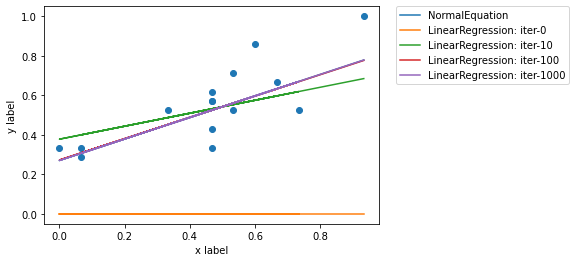

In [7]:
import matplotlib.pyplot as plt
regression_X = iris.data[:50]
regression_X = sklearn.preprocessing.MinMaxScaler().fit_transform(regression_X)
regression_X = np.pad(regression_X, ((0,0),(1,0)), 'constant', constant_values=(1))       #为X填充x_0=1
regression_y = iris.target[:50]
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(regression_X, regression_y, test_size=0.3, random_state=2021, shuffle=True)

show_X_train = reg_X_train[:,:2]
show_X_test = reg_X_test[:,:2]
show_X_test_scatter = reg_X_test[:,1]
show_y_train = reg_X_train[:,2:3]
show_y_test = reg_X_test[:,2:3]
show_y_train = show_y_train.reshape((show_y_train.shape[0],))
show_y_test = show_y_test.reshape((show_y_test.shape[0],))

show_nor_equ = NormalEquation(2)
show_nor_equ.train(show_X_train, show_y_train)
show_lr_0 = LinearRegression(2)
show_lr_0.train(show_X_train, show_y_train, iteration=0)
show_lr_10 = LinearRegression(2)
show_lr_10.train(show_X_train, show_y_train, iteration=10)
show_lr_100 = LinearRegression(2)
show_lr_100.train(show_X_train, show_y_train, iteration=100)
show_lr_1000 = LinearRegression(2)
show_lr_1000.train(show_X_train, show_y_train, iteration=1000)

model_dict = {
    show_nor_equ: "NormalEquation",
    show_lr_0: "LinearRegression: iter-0",
    show_lr_10: "LinearRegression: iter-10",
    show_lr_100: "LinearRegression: iter-100",
    show_lr_1000: "LinearRegression: iter-1000"
}
plt.xlabel('x label')
plt.ylabel('y label')
plt.scatter(show_X_test_scatter, show_y_test)
for model, model_str in model_dict.items():
    # model.train(show_X_train, show_y_train)
    plt.plot(show_X_test_scatter, model.predict(show_X_test), label=model_str)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

### 模型优化
#### kFold算法交叉验证
将数据集k等分进行交叉验证

In [8]:
from sklearn.model_selection import KFold
def score_with_kfold(X, y, model, needIter=False, iter=1000):
    kf = KFold(n_splits=10, shuffle=True, random_state=2021)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        Model = model(X_train.shape[1])
        if needIter == False:
            Model.train(X_train, y_train)
        else:
            Model.train(X_train, y_train, iteration=iter)
        test_result = Model.predict(X_test).round()
        scores.append(score(test_result, y_test))
    return np.mean(scores)

In [9]:
X = iris.data
y = iris.target
X = sklearn.preprocessing.MinMaxScaler().fit_transform(X)
X = np.pad(X, ((0,0),(1,0)), 'constant', constant_values=(1))       #为X填充x_0=1
model_nor_equ = NormalEquation
iter_list = [0, 10, 100, 1000]
print("NormalEquation", 'accuracy: %.4f' % score_with_kfold(X, y, model_nor_equ))
for iter in iter_list:
    print("LinearRegression-iter %-4s" %str(iter),"accuracy: %.4f" % score_with_kfold(X, y, LinearRegression, needIter=True, iter=iter))


NormalEquation accuracy: 0.9600
LinearRegression-iter 0    accuracy: 0.3333
LinearRegression-iter 10   accuracy: 0.7933
LinearRegression-iter 100  accuracy: 0.9600
LinearRegression-iter 1000 accuracy: 0.9600


#### RidgeRegression(岭回归)
为最小二乘法估计中加入一个扰动$\lambda I$，使得原先无法求出广义逆的情况变成可以求出其广义逆，使得问题稳定并得以求解。同时，岭回归在计算`loss`时加入$L2$正则化，即:
$$J = \frac{1}{2m}\sum_{i=1}^m(z^{(i)}-y^{(i)})^2 + \lambda\sum_{i=0}^nw_i^2$$

In [10]:
class RidgeRegression(LinearRegression):
    def __init__(self, feature_dimension, lambdaI=0.01):
        super().__init__(feature_dimension)
        self.lambdaI = lambdaI
    
    def cal_loss(self, X, y):
        """calculate the loss function using input matrix X and vector y

        Args:
            X (numpy.array((sample_number, feature_dimension))): matrix X
            y (numpy.array((feature_dimension, ))): vector y

        Returns:
            [float]: the loss of the training data
            [numpy.array]: delta W
        """
        m = X.shape[0]
        w = self.W
        l = self.lambdaI
        y_hat = np.dot(X, w)
        dy = y_hat - y
        loss = dy.T.dot(dy)
        loss = loss / 2 / m
        loss += l * np.sum(np.power(w, 2))
        dw = X.T.dot(dy)/m
        dw += 2 * l * w
        return loss, dw

In [11]:
for iter in iter_list:
    print("RidgeRegression-iter %-4s"%str(iter),"accuracy: %.4f" % score_with_kfold(X, y, RidgeRegression, needIter=True, iter=iter))


RidgeRegression-iter 0    accuracy: 0.3333
RidgeRegression-iter 10   accuracy: 0.7400
RidgeRegression-iter 100  accuracy: 0.9600
RidgeRegression-iter 1000 accuracy: 0.9600


#### LassoRegression(Lasso回归)
Lasso回归与岭回归类似，同样引入扰动$\lambda I$，但在计算`loss`时加上$L1$正则化，也即:
$$J = \frac{1}{2m}\sum_{i=1}^m(z^{(i)}-y^{(i)})^2 + \lambda\sum_{i=0}^n|w_i|$$

In [12]:
class LassoRegression(LinearRegression):
    def __init__(self, feature_dimension, lambdaI=0.01):
        super().__init__(feature_dimension)
        self.lambdaI = lambdaI
    
    def cal_loss(self, X, y):
        """calculate the loss function using input matrix X and vector y

        Args:
            X (numpy.array((sample_number, feature_dimension))): matrix X
            y (numpy.array((feature_dimension, ))): vector y

        Returns:
            [float]: the loss of the training data
            [numpy.array]: delta W
        """
        m = X.shape[0]
        w = self.W
        l = self.lambdaI
        y_hat = np.dot(X, w)
        dy = y_hat - y
        loss = dy.T.dot(dy)
        loss = loss / 2 / m
        loss += l * np.sum(np.abs(w))
        dw = X.T.dot(dy)/m
        dw += 2 * l * w
        return loss, dw

In [13]:
for iter in iter_list:
    print("LassoRegression-iter %-4s"%str(iter),"accuracy: %.4f" % score_with_kfold(X, y, LassoRegression, needIter=True, iter=iter))
    

LassoRegression-iter 0    accuracy: 0.3333
LassoRegression-iter 10   accuracy: 0.7400
LassoRegression-iter 100  accuracy: 0.9600
LassoRegression-iter 1000 accuracy: 0.9600


#### Lasso和Ridge的对比
`RidgeRegression`中，以两个变量为例, 残差平方和可以表示为$w_1, w_2$的一个二次函数，是一个在三维空间中的抛物面，可以用等值线来表示。而限制条件$w_1^2+w_2^2<t$，相当于在二维平面的一个圆。这个时候等值线与圆相切的点便是在约束条件下的最优点。

而对于`LassoRegression`而言，同样以两个变量为例，标准线性回归的$loss$还是可以用二维平面的等值线表示，而约束条件则与岭回归的圆不同，`lasso`的约束条件可以用方形表示。相比圆，方形的顶点更容易与抛物面相交，顶点就意味着对应的很多系数为0，而岭回归中的圆上的任意一点都很容易与抛物面相交很难得到正好等于0的系数。这也就意味着，`lasso`起到了很好的筛选变量的作用。

![LassoRidge_Graphic](./LassoRidge.png "`LassoRegression`(left) and `RidgeRegression`(right)")

## 结果分析和思考
通过模型训练对标签进行预测，并在数据处理时采用了标准化的方式进行预处理。同时，通过正规方程法、梯度下降法和岭回归三种方法对模型进行训练，并得到了他们各自的预测准确率。还使用正规方程法和梯度下降法不同迭代次数对同一种花的数据进行了线性回归的可视化处理。

下面，我将分析和思考各个处理的原因和特点。
- 数据标准化

    当一组数据有多个特征时，不同特征的数量级可能并不一样，各特征之间差距大会导致不同特征的权重不一样，从而使得结果不稳定、不可靠。因而可以通过将数据根据在自身维度上的大小统一映射到一个区间内，便消除了不同特征数量级的影响。

    ![数据标准化](./normalization.jpeg)
    

- 正规方程法

    正规方程法从均方差(MSE)出发，通过让均方差最小，从方程组出发，从数学角度解出参数矩阵$W$，得到数据可靠条件下的理论最优解。这种方式在数据可靠和噪点少的情况下可信度高，但
  - 优点:

  1. 在数据可靠和噪点少的情况下可信度高
  - 缺点:

  1. 模型的延展性较差，无法在已有模型的基础上进一步训练，只能通过重新建立方程组求解的方式来得到新的$W$矩阵。
  2. 无法辨别出数据中的噪点，无法确定数据的权重，所有变量均被视为不同线性维度上的互不相关的变量，都拥有相同的权重。

- 梯度下降法

    梯度下降法也从均方差(MSE)出发，但并不直接解出$W$，而是通过梯度下降的方式，不断迭代逼近$W$，并且从实验结果可以看出，迭代次数足够多时，梯度下降法正确率与正规方程法相同，这是因为已经逼近到与理论最优解相等。
  - 优点:

  1. 模型延展性好，已有模型再加入数据训练也只需要增加迭代次数而对$W$进行调整。
  - 缺点:

  1. 本质上也是通过逼近正规方程结果得到，但当某些列间线性相关性大时，$X^TX$不满秩，接近奇异矩阵，误差很大。
- 岭回归

    岭回归是梯度下降法的一种优化解法，通过加上$\lambda I$来对矩阵的秩进行调整，也就将不适定问题转化为了适定问题。

  - 优点:

  1. 降低了多重共线问题的出现概率，缓解了过拟合问题，增强了模型的稳定性和可靠性。
  - 缺点:

  1. $\lambda I$的加入会损失部分信息、降低精度。
  2. 没有从根本上解决多重共线问题。

- Lasso回归

    Lasso回归与岭回归类似，也是通过加上$\lambda I$来对矩阵的秩进行调整，也就将不适定问题转化为了适定问题。
  - 优点

  1. 与岭回归类似缓解过拟合问题。
  2. 比起岭回归更容易使部分权重变为0，从而可以进行`feature selection`
  - 缺点
  1. 会损失信息、降低精度，特别是进行`feature selection`。
  2. 同样没有在根本上解决多重共线问题。
  3. 无法得出显式解，智能使用近似化的计算法（坐标轴下降法和最小角回归法）估计出来的结果不太稳定，存在一定的误差。

## 总结
本次实验我们分别通过正规方程法、梯度下降法和岭回归法三种方法对回归问题进行分析，证明了数学角度上的可行性。搭建了这三种模型，均在iris数据集上取得了良好的效果，并且三者在充分训练时(迭代次数足够时)，预测得到的正确率是相同的。这一过程中，我们通过标准化的方式消除了数据之间量级的差异，保证了数据的可靠性和模型的稳定性；利用kFold交叉验证算法保证了数据的充分利用和模型的可靠性。最终得到了约0.96的准确率。